In [10]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import sklearn.metrics as skn
from collections import Counter

# Reading the MNIST dataset

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


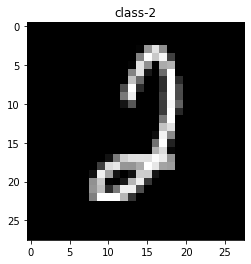

Train image 7344-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 153 228 143
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 254 201 246
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5 228 144   2 171
  179   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 132 227  24   0 107
  254   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 194 106   0   0  46
  254  45   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [11]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/Shibajee/Assignments/ML/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extracting 20% data from the training set for validation set

In [12]:
MNIST_data = train_images.reshape(len(train_images), 28*28); MNIST_data.shape


(60000, 784)

In [13]:
MNIST_labels = train_labels; MNIST_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
A = np.random.randint(60000, size = 60000)

In [15]:
training_data = MNIST_data[A[0:48000]]; training_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
validation_data =MNIST_data[A[48000:48100]]; validation_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
training_labels = MNIST_labels[A[0:48000]]; training_labels

array([2, 9, 3, ..., 0, 2, 3], dtype=uint8)

In [18]:

(unique, counts) = np.unique(training_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
4638,0
5384,1
4894,2
4930,3
4698,4
4362,5
4634,6
5079,7
4603,8
4778,9


In [34]:
validation_labels = MNIST_labels[A[48000:48100]]; validation_labels

array([0, 7, 6, 1, 8, 5, 7, 9, 4, 5, 4, 6, 5, 3, 7, 9, 1, 5, 8, 2, 2, 5,
       7, 7, 4, 6, 8, 3, 7, 3, 0, 3, 1, 9, 7, 6, 9, 6, 9, 7, 2, 7, 6, 1,
       5, 4, 3, 1, 3, 4, 6, 5, 6, 5, 3, 9, 2, 6, 6, 0, 4, 3, 2, 0, 6, 1,
       4, 2, 0, 7, 3, 6, 2, 0, 0, 1, 8, 8, 6, 2, 3, 0, 6, 9, 9, 1, 9, 6,
       6, 9, 5, 3, 2, 1, 5, 8, 9, 0, 2, 6], dtype=uint8)

In [35]:
(unique, counts) = np.unique(validation_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
9,0
9,1
10,2
11,3
7,4
10,5
17,6
10,7
6,8
11,9


# Randomizing the test data

In [21]:
MNIST_test_data = test_images.reshape(len(test_images), 28*28); MNIST_test_data.shape

(10000, 784)

In [22]:
B = np.random.randint(10000, size = 10000)

In [23]:
test_data = MNIST_test_data[B[0:10000]]; test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
test_labels = test_labels[B[0:10000]]; test_labels

array([5, 1, 1, ..., 0, 0, 9], dtype=uint8)

In [25]:
(unique, counts) = np.unique(test_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
977,0
1087,1
1040,2
1043,3
1010,4
844,5
952,6
1040,7
987,8
1020,9


# Implementing kNN classifier

In [34]:
## Euclidean Distance
def Euclidean_distance(x,y):
    E = np.linalg.norm(x-y)
    return E


In [35]:
def Euclidean_minimum(n):
    distances = []
    for j in range(n):
        distance = []
        for i in range(len(training_data)):
            dis = (Euclidean_distance(validation_data[j], training_data[i]), training_labels[i])
            distance.append(dis)
        distances.append(sorted(distance))
    return distances

In [36]:
euc = Euclidean_minimum(1000) ##Changing the number of validation data points


In [37]:
def Euclidean_nearest(k):
    predic = []
    for i in range(len(euc)):
        pred = []
        for j in range(k):
            pre = euc[i][j]
            pred.append(pre)
        predic.append(pred)
    return predic

In [38]:
def acc(k):
    eucp = Euclidean_nearest(k)    ## Change the K value
    labels = []
    for i in range(len(euc)):
        label = []
        for j in range(len(eucp[i])):
            lab = eucp[i][j][1]
            label.append(lab)
        labels.append(label)
        digit = []
    for i in range(len(labels)):
        digit.append(max(labels[i], key = labels[i].count))
    sum = 0
    for i in range(len(digit)):
        if(digit[i] == validation_labels[i]):
            sum+= 1
        else :
            sum+=0
    accuracy = (sum/len(digit))*100
    return accuracy


In [39]:
accur = []
for k in range(1,26,2):
    f = (acc(k),k)
    accur.append(f)
    
accu = pd.DataFrame(accur)
accu.columns = ['Accuracy', 'K-value']; accu



,Accuracy,K-value
0,90.0,1
1,85.4,3
2,84.2,5
3,83.9,7
4,84.0,9
5,84.2,11
6,83.6,13
7,83.6,15
8,84.0,17
9,83.5,19


# Accuracy on validation data set

In [40]:
accuracy = accu.Accuracy.max(); accuracy


90.0

# K - value

In [41]:
index = accu['Accuracy'].idxmax()
K = accu['K-value'][index]; K

1

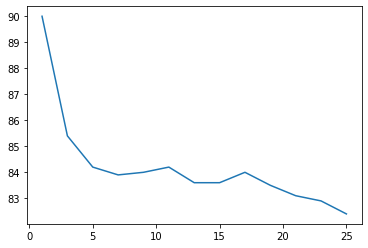

In [42]:
plt.plot(accu["K-value"],accu['Accuracy'])

# Using Scikit


In [44]:
def knn_distance(train_image,train_label,test_image,distance):
    k = skn.pairwise_distances(train_image,test_image,metric=distance)
    dist = []
    for j in range(len(test_image)):
        l = []
        for i in range(len(train_image)):
            p = (k[i,j],train_label[i])
            l.append(p)
        dist.append(sorted(l))
    return dist

In [45]:
def knn_prediction(kneighours,distance):
    predic = []
    for i in range(len(distance)):
        pred = []
        for j in range(kneighours):
            pre = distance[i][j][1]
            pred.append(pre)
        predic.append(pred)
    label_prediction = []
    for i in range(len(predic)):
        k1 = Counter(predic[i]).most_common(1)[0][0]
        label_prediction.append(k1)
    return label_prediction

In [46]:
euclidean_distance = knn_distance(training_data,training_labels,validation_data, "euclidean"); euclidean_distance

[[(0.0, 0),
  (0.0, 0),
  (0.0, 0),
  (840.2047369540355, 0),
  (840.2047369540355, 0),
  (977.1402151175644, 0),
  (1008.962338246577, 0),
  (1072.8247760002562, 0),
  (1072.8247760002562, 0),
  (1099.100541351882, 0),
  (1099.100541351882, 0),
  (1212.460308628699, 0),
  (1212.460308628699, 0),
  (1243.2928054163267, 0),
  (1243.2928054163267, 0),
  (1243.2928054163267, 0),
  (1273.4084183795865, 0),
  (1273.4084183795865, 0),
  (1273.9069824755652, 0),
  (1284.3780596070612, 0),
  (1291.0007745931061, 0),
  (1309.5441955123165, 0),
  (1322.8488197825177, 0),
  (1322.8488197825177, 0),
  (1322.8488197825177, 0),
  (1330.9481582691342, 0),
  (1334.9131057862905, 0),
  (1339.4136776963269, 0),
  (1349.535105138062, 0),
  (1349.591049170081, 0),
  (1352.7372250367032, 0),
  (1364.590048329534, 0),
  (1364.590048329534, 0),
  (1365.4819661936222, 0),
  (1365.4819661936222, 0),
  (1373.0254913875415, 0),
  (1373.0254913875415, 0),
  (1384.749435818625, 0),
  (1389.133182959791, 0),
  (138

In [49]:
euclidean_prediction_list = [knn_prediction(k,euclidean_distance) for k in range(1,26,2)]

In [47]:
def accuracy(pred,real):
    accuracy = (np.array(np.array(pred)==np.array(real)).sum()/len(pred))*100
    return accuracy

In [50]:
accuracy_list = [accuracy(ii,validation_labels) for ii in euclidean_prediction_list]
klist = list(range(1,26,2))
Position = np.argmax(np.array(accuracy_list))
value_k = klist[Position]
acc = accuracy_list[Position]

In [51]:
acc

98.0

# Testing Data Set

In [43]:
def Euclidean_test_minimum(n):
    distances = []
    for j in range(n):
        distance = []
        for i in range(len(training_data)):
            dis = (Euclidean_distance(test_data[j], training_data[i]), training_labels[i])
            distance.append(dis)
        distances.append(sorted(distance))
    return distances

In [44]:
euc_t = Euclidean_test_minimum(100)

In [45]:
def Euclidean_test_nearest(k):
    predic = []
    for i in range(len(euc_t)):
        pred = []
        for j in range(k):
            pre = euc_t[i][j]
            pred.append(pre)
        predic.append(pred)
    return predic

In [46]:
euc_tp = Euclidean_test_nearest(K)    ## Change the K value
labels = []
for i in range(len(euc_t)):
    label = []
    for j in range(len(euc_tp[i])):
        lab = euc_tp[i][j][1]
        label.append(lab)
    labels.append(label)
    digit = []
for i in range(len(labels)):
    digit.append(max(labels[i], key = labels[i].count))
sum = 0
for i in range(len(digit)):
    if(digit[i] == test_labels[i]):
        sum+= 1
    else :
        sum+=0
accuracy = (sum/len(digit))*100
accuracy

80.0

In [47]:
act = []
for i in range(len(digit)):
    act.append(test_labels[i])

In [48]:
predicted = np.array(digit)
actual = np.array(act)

In [49]:
confusion_matrix = pd.crosstab(predicted, actual); confusion_matrix

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,7,0,0,0,0,0,0,0,0,0
1,0,14,0,2,2,1,0,0,2,0
2,0,0,4,0,0,0,0,0,0,0
3,0,0,0,4,0,1,0,0,1,0
4,0,0,0,0,10,0,0,1,0,0
5,0,0,0,0,0,5,0,0,0,0
6,0,0,1,0,0,0,11,0,0,0
7,0,0,0,0,0,0,0,12,1,0
8,0,0,1,1,1,1,0,0,7,1
